Mean Squared Error: 252.0532
SNR: 0.1062
Call Duration (s): 0.0887
Attenuation: 0.1041
Distance to Tower (km): 0.1068
Environment_home: 0.0325
Environment_open: 0.0399
Environment_suburban: 0.0103
Environment_urban: 0.0451
Tower ID_1: 0.0076
Tower ID_2: 0.0084
Tower ID_3: 0.0044
Tower ID_4: 0.0193
Tower ID_5: 0.0083
Tower ID_6: 0.0010
Tower ID_7: 0.0096
Tower ID_8: 0.0033
Tower ID_9: 0.0067
Tower ID_10: 0.0158
User ID_1: 0.0060
User ID_2: 0.0020
User ID_3: 0.0048
User ID_4: 0.0014
User ID_5: 0.0035
User ID_6: 0.0071
User ID_7: 0.0017
User ID_8: 0.0000
User ID_9: 0.0000
User ID_10: 0.0038
User ID_11: 0.0008
User ID_12: 0.0000
User ID_13: 0.0000
User ID_14: 0.0000
User ID_15: 0.0000
User ID_16: 0.0078
User ID_17: 0.0082
User ID_18: 0.0000
User ID_19: 0.0070
User ID_20: 0.0000
User ID_21: 0.0000
User ID_22: 0.0092
User ID_23: 0.0000
User ID_24: 0.0055
User ID_25: 0.0000
User ID_26: 0.0000
User ID_27: 0.0015
User ID_28: 0.0017
User ID_29: 0.0097
User ID_30: 0.0006
User ID_31: 0.0079
User I

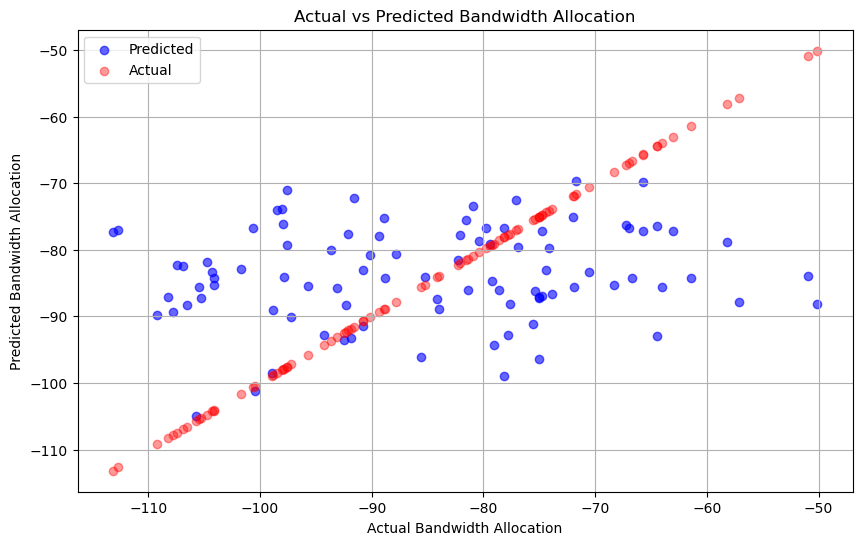

Latency Mean Squared Error: 11305108480043245052624896.0000


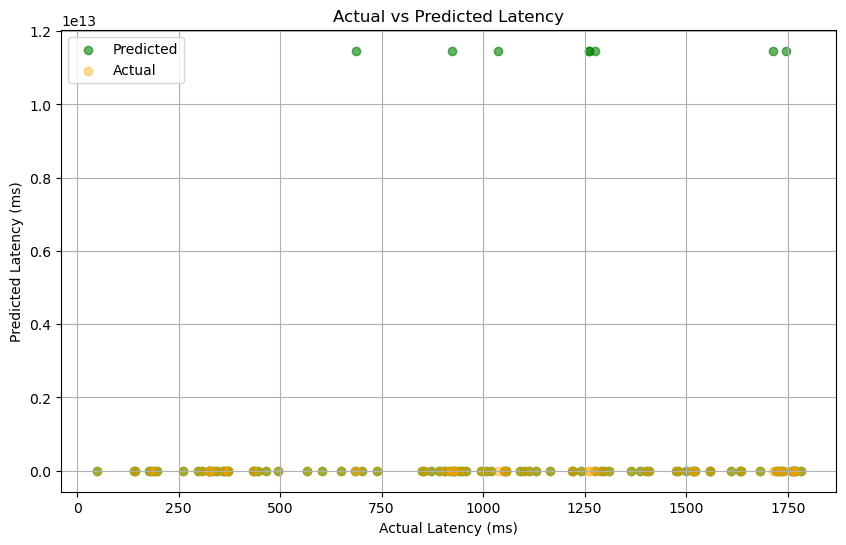

C:\Users\anubh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 352665.5312
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 296991.2500
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 288987.0625
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 261619.6719
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 228195.3438
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 235916.2188
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 209499.7812
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 231887.9062
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 227340.9844
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 205748.1875
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 205018.9844
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 219179.9688
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 209732.1406
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 215861.0469
Epoch 15/2

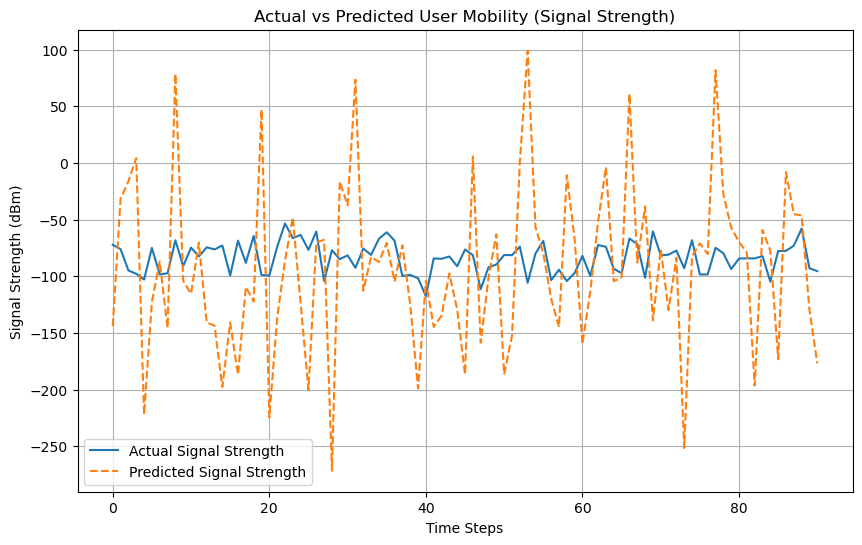

Interference Prediction Accuracy: 1.0000


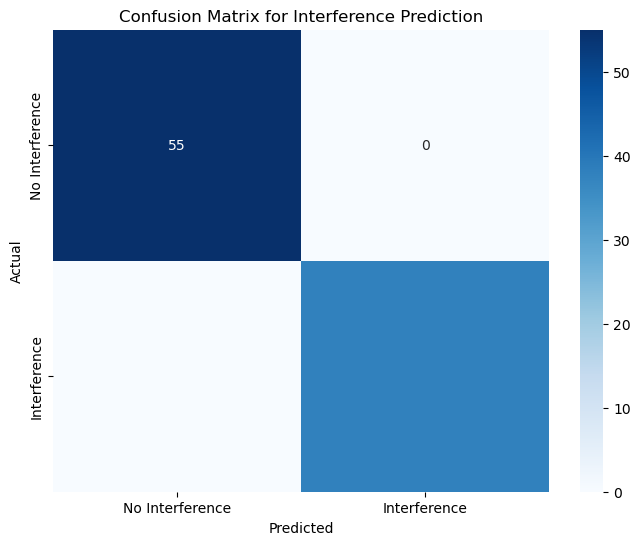

Energy Efficiency Mean Squared Error: 6.9417


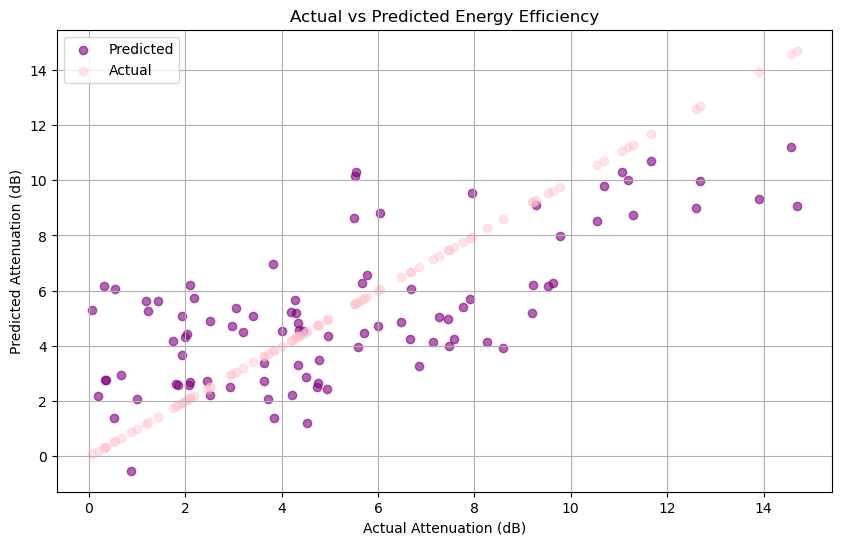

High Traffic Mean Squared Error: 60.3559


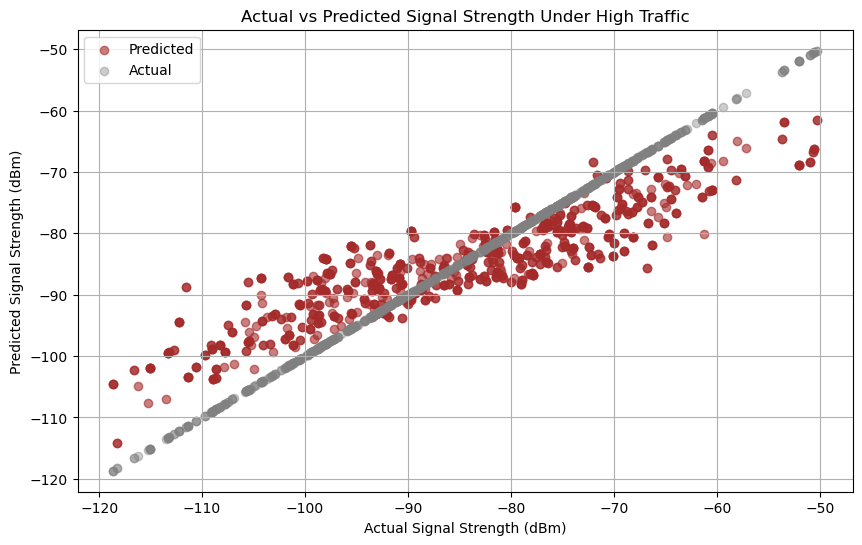

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("C:/Users/anubh/Downloads/train.csv")

# Preprocessing
df = df.dropna()
categorical_cols = ["Environment", "Tower ID", "User ID", "Call Type", "Incoming/Outgoing"]
df = pd.get_dummies(df, columns=categorical_cols)

# Define features and target
X = df.drop(columns=["Timestamp", "Signal Strength (dBm)"])
y = df["Signal Strength (dBm)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Feature importance
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

import matplotlib.pyplot as plt

# Plot actual vs predicted bandwidth allocation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.4, label='Actual')
plt.title('Actual vs Predicted Bandwidth Allocation')
plt.xlabel('Actual Bandwidth Allocation')
plt.ylabel('Predicted Bandwidth Allocation')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.linear_model import LinearRegression

# Define features and target for latency
X_latency = df.drop(columns=["Timestamp", "Call Duration (s)"])
y_latency = df["Call Duration (s)"]

# Split data
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_latency, y_latency, test_size=0.2, random_state=42)

# Train model
latency_model = LinearRegression()
latency_model.fit(X_train_lat, y_train_lat)

# Predict
y_pred_lat = latency_model.predict(X_test_lat)

# Evaluate
mse_lat = mean_squared_error(y_test_lat, y_pred_lat)
print(f"Latency Mean Squared Error: {mse_lat:.4f}")

# Plot actual vs predicted latency
plt.figure(figsize=(10, 6))
plt.scatter(y_test_lat, y_pred_lat, color='green', alpha=0.6, label='Predicted')
plt.scatter(y_test_lat, y_test_lat, color='orange', alpha=0.4, label='Actual')
plt.title('Actual vs Predicted Latency')
plt.xlabel('Actual Latency (ms)')
plt.ylabel('Predicted Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_seq, y_seq = create_sequences(df[["Signal Strength (dBm)", "Call Duration (s)"]], seq_length)

# Split data
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 2)))
model_lstm.add(Dense(2))
model_lstm.compile(optimizer='adam', loss='mse')

# Train model
model_lstm.fit(X_train_seq, y_train_seq, epochs=20, verbose=1)

# Predict
y_pred_seq = model_lstm.predict(X_test_seq)

# Evaluate
mse_seq = mean_squared_error(y_test_seq, y_pred_seq)
print(f"LSTM Mean Squared Error: {mse_seq:.4f}")

# Plot actual vs predicted user mobility (LSTM)
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq[:, 0], label='Actual Signal Strength')
plt.plot(y_pred_seq[:, 0], label='Predicted Signal Strength', linestyle='--')
plt.title('Actual vs Predicted User Mobility (Signal Strength)')
plt.xlabel('Time Steps')
plt.ylabel('Signal Strength (dBm)')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.ensemble import RandomForestClassifier

# Define features and target for interference
df["Interference"] = np.where(df["SNR"] < 20, 1, 0)  # Example threshold
X_interf = df.drop(columns=["Timestamp", "Interference"])
y_interf = df["Interference"]

# Split data
X_train_interf, X_test_interf, y_train_interf, y_test_interf = train_test_split(X_interf, y_interf, test_size=0.2, random_state=42)

# Train model
interf_model = RandomForestClassifier(n_estimators=100, random_state=42)
interf_model.fit(X_train_interf, y_train_interf)

# Predict
y_pred_interf = interf_model.predict(X_test_interf)

# Evaluate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_interf, y_pred_interf)
print(f"Interference Prediction Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for interference prediction
cm = confusion_matrix(y_test_interf, y_pred_interf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Interference', 'Interference'], yticklabels=['No Interference', 'Interference'])
plt.title('Confusion Matrix for Interference Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.ensemble import GradientBoostingRegressor

# Define features and target for energy efficiency
X_energy = df.drop(columns=["Timestamp", "Attenuation"])
y_energy = df["Attenuation"]

# Split data
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Train model
energy_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
energy_model.fit(X_train_energy, y_train_energy)

# Predict
y_pred_energy = energy_model.predict(X_test_energy)

# Evaluate
mse_energy = mean_squared_error(y_test_energy, y_pred_energy)
print(f"Energy Efficiency Mean Squared Error: {mse_energy:.4f}")

# Plot actual vs predicted energy efficiency
plt.figure(figsize=(10, 6))
plt.scatter(y_test_energy, y_pred_energy, color='purple', alpha=0.6, label='Predicted')
plt.scatter(y_test_energy, y_test_energy, color='pink', alpha=0.4, label='Actual')
plt.title('Actual vs Predicted Energy Efficiency')
plt.xlabel('Actual Attenuation (dB)')
plt.ylabel('Predicted Attenuation (dB)')
plt.legend()
plt.grid(True)
plt.show()

# Simulate high traffic by duplicating data
df_high_traffic = pd.concat([df] * 10, ignore_index=True)

# Define features and target for high traffic
X_high = df_high_traffic.drop(columns=["Timestamp", "Signal Strength (dBm)"])
y_high = df_high_traffic["Signal Strength (dBm)"]

# Split data
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Train model
high_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
high_model.fit(X_train_high, y_train_high)

# Predict
y_pred_high = high_model.predict(X_test_high)

# Evaluate
mse_high = mean_squared_error(y_test_high, y_pred_high)
print(f"High Traffic Mean Squared Error: {mse_high:.4f}")

# Plot actual vs predicted performance under high traffic
plt.figure(figsize=(10, 6))
plt.scatter(y_test_high, y_pred_high, color='brown', alpha=0.6, label='Predicted')
plt.scatter(y_test_high, y_test_high, color='gray', alpha=0.4, label='Actual')
plt.title('Actual vs Predicted Signal Strength Under High Traffic')
plt.xlabel('Actual Signal Strength (dBm)')
plt.ylabel('Predicted Signal Strength (dBm)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20


C:\Users\anubh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 823254.7500
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 656358.8750
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 514507.3438
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 382495.7500
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 296882.0000
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 280114.5000
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 284182.7812
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 255764.9688
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 219202.3750
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 240524.3906
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 208112.6406
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 214573.7969
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 190758.8438
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 205827.0312
Epoch 15/20
12/12 ━━━━━━━

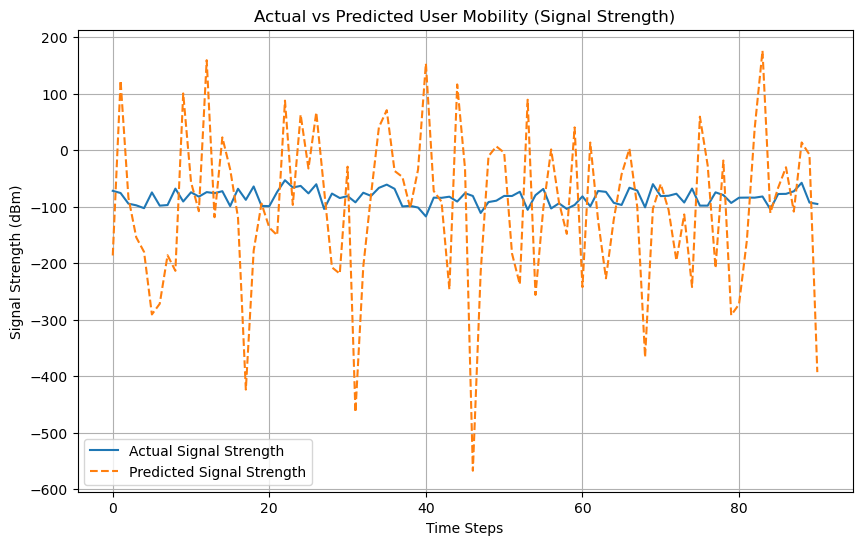

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_seq, y_seq = create_sequences(df[["Signal Strength (dBm)", "Call Duration (s)"]], seq_length)

# Split data
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 2)))
model_lstm.add(Dense(2))
model_lstm.compile(optimizer='adam', loss='mse')

# Train model
model_lstm.fit(X_train_seq, y_train_seq, epochs=20, verbose=1)

# Predict
y_pred_seq = model_lstm.predict(X_test_seq)

# Evaluate
mse_seq = mean_squared_error(y_test_seq, y_pred_seq)
print(f"LSTM Mean Squared Error: {mse_seq:.4f}")
# Plot actual vs predicted user mobility (LSTM)
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq[:, 0], label='Actual Signal Strength')
plt.plot(y_pred_seq[:, 0], label='Predicted Signal Strength', linestyle='--')
plt.title('Actual vs Predicted User Mobility (Signal Strength)')
plt.xlabel('Time Steps')
plt.ylabel('Signal Strength (dBm)')
plt.legend()
plt.grid(True)
plt.show()

Interference Prediction Accuracy: 1.0000


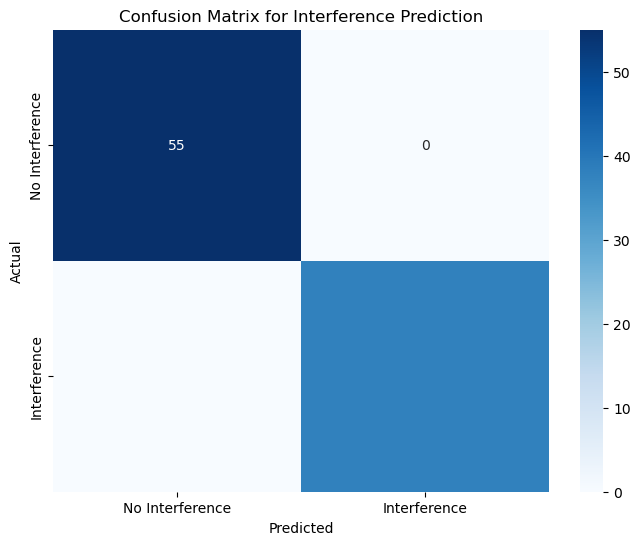

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target for interference
df["Interference"] = np.where(df["SNR"] < 20, 1, 0)  # Example threshold
X_interf = df.drop(columns=["Timestamp", "Interference"])
y_interf = df["Interference"]

# Split data
X_train_interf, X_test_interf, y_train_interf, y_test_interf = train_test_split(X_interf, y_interf, test_size=0.2, random_state=42)

# Train model
interf_model = RandomForestClassifier(n_estimators=100, random_state=42)
interf_model.fit(X_train_interf, y_train_interf)

# Predict
y_pred_interf = interf_model.predict(X_test_interf)

# Evaluate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_interf, y_pred_interf)
print(f"Interference Prediction Accuracy: {accuracy:.4f}")
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for interference prediction
cm = confusion_matrix(y_test_interf, y_pred_interf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Interference', 'Interference'], yticklabels=['No Interference', 'Interference'])
plt.title('Confusion Matrix for Interference Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Energy Efficiency Mean Squared Error: 6.9417


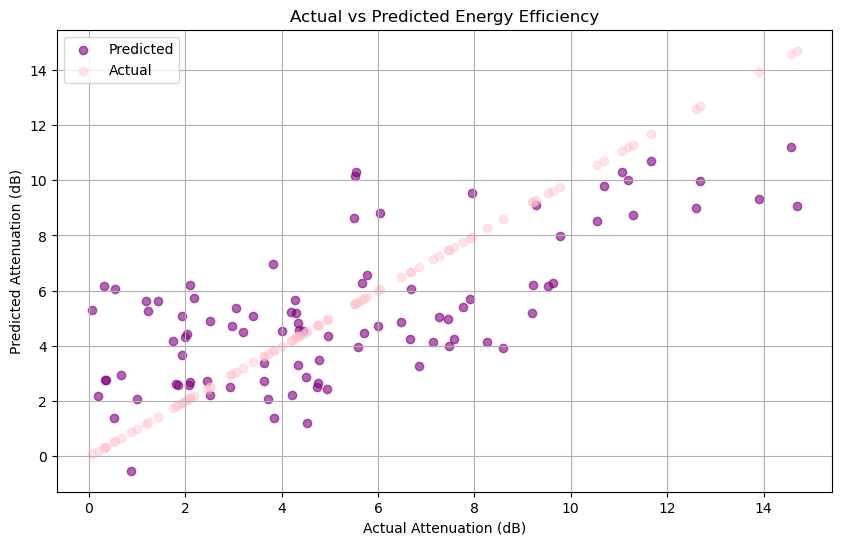

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

# Define features and target for energy efficiency
X_energy = df.drop(columns=["Timestamp", "Attenuation"])
y_energy = df["Attenuation"]

# Split data
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Train model
energy_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
energy_model.fit(X_train_energy, y_train_energy)

# Predict
y_pred_energy = energy_model.predict(X_test_energy)

# Evaluate
mse_energy = mean_squared_error(y_test_energy, y_pred_energy)
print(f"Energy Efficiency Mean Squared Error: {mse_energy:.4f}")
# Plot actual vs predicted energy efficiency
plt.figure(figsize=(10, 6))
plt.scatter(y_test_energy, y_pred_energy, color='purple', alpha=0.6, label='Predicted')
plt.scatter(y_test_energy, y_test_energy, color='pink', alpha=0.4, label='Actual')
plt.title('Actual vs Predicted Energy Efficiency')
plt.xlabel('Actual Attenuation (dB)')
plt.ylabel('Predicted Attenuation (dB)')
plt.legend()
plt.grid(True)
plt.show()

High Traffic Mean Squared Error: 60.3559


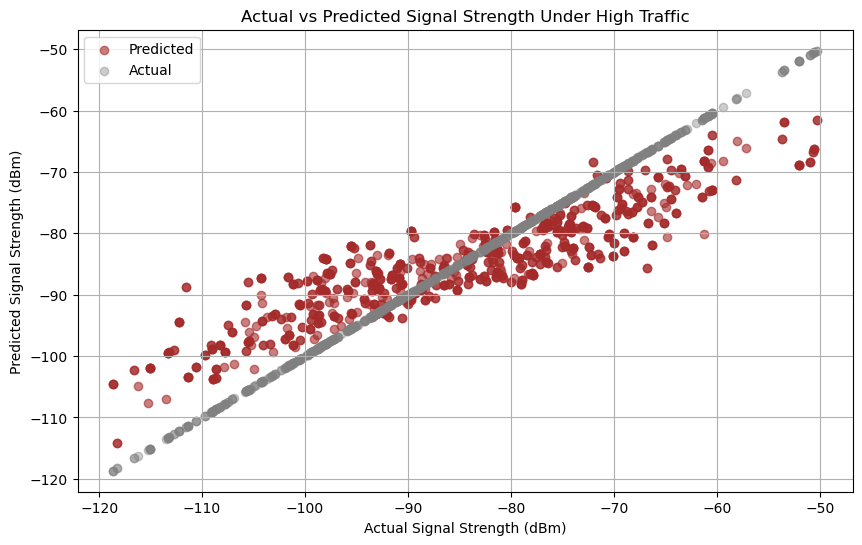

In [6]:
# Simulate high traffic by duplicating data
df_high_traffic = pd.concat([df] * 10, ignore_index=True)

# Define features and target for high traffic
X_high = df_high_traffic.drop(columns=["Timestamp", "Signal Strength (dBm)"])
y_high = df_high_traffic["Signal Strength (dBm)"]

# Split data
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Train model
high_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
high_model.fit(X_train_high, y_train_high)

# Predict
y_pred_high = high_model.predict(X_test_high)

# Evaluate
mse_high = mean_squared_error(y_test_high, y_pred_high)
print(f"High Traffic Mean Squared Error: {mse_high:.4f}")
# Plot actual vs predicted performance under high traffic
plt.figure(figsize=(10, 6))
plt.scatter(y_test_high, y_pred_high, color='brown', alpha=0.6, label='Predicted')
plt.scatter(y_test_high, y_test_high, color='gray', alpha=0.4, label='Actual')
plt.title('Actual vs Predicted Signal Strength Under High Traffic')
plt.xlabel('Actual Signal Strength (dBm)')
plt.ylabel('Predicted Signal Strength (dBm)')
plt.legend()
plt.grid(True)
plt.show()

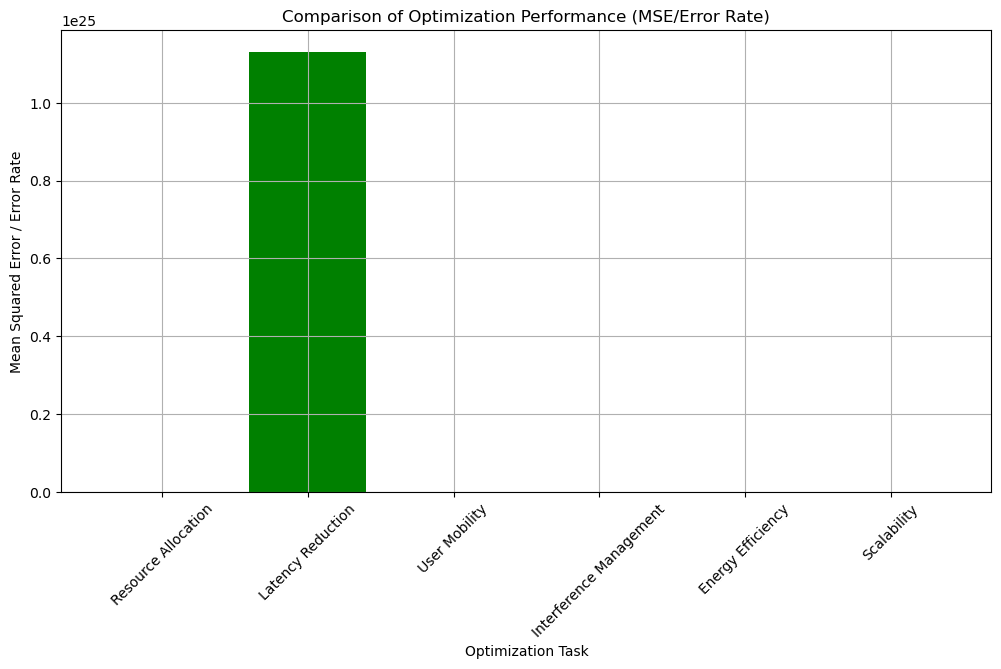

In [7]:
# Define metrics for each task
metrics = {
    'Resource Allocation': mse,
    'Latency Reduction': mse_lat,
    'User Mobility': mse_seq,
    'Interference Management': 1 - accuracy,  # Use error rate for consistency
    'Energy Efficiency': mse_energy,
    'Scalability': mse_high
}

# Plot comparison graph
plt.figure(figsize=(12, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Comparison of Optimization Performance (MSE/Error Rate)')
plt.xlabel('Optimization Task')
plt.ylabel('Mean Squared Error / Error Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()